# **Space X  Falcon 9 First Stage Landing Prediction**


import all required library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

function for plot confusion matrix.


In [2]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y,y_predict):
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

In [3]:
data = pd.read_csv("spacex_launch2.csv")
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


Load the data


In [4]:
X = pd.read_csv("spacexApi_dataset_part3.csv")
X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


dataset proessing for modeling

In [5]:
Y=data['Class'].to_numpy()

Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [6]:
transform = preprocessing.StandardScaler()
X=transform.fit_transform(X)

In [7]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=2)

In [8]:
Y_test.shape

(18,)

## Modeling

<h3>1. Logistic regresion</h3>

In [9]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv=GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [10]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


<h4>Accuracy score calculate of logistic regression</h4>

In [11]:
logreg_cv.score(X_test, Y_test)

0.8333333333333334

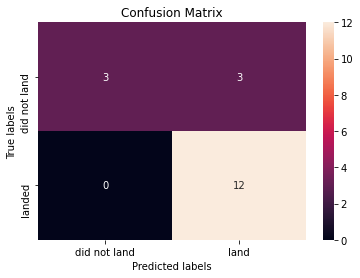

In [12]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

<h3>2. Decision Tree Classifier</h3>

In [13]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [14]:
tree_cv=GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [ ]:
tree_cv=GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)

In [15]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.8910714285714285


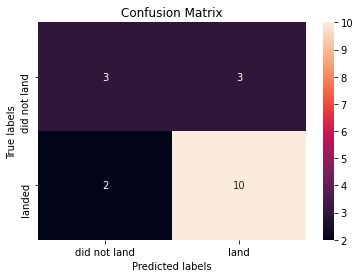

In [17]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

<h3>3. Support Vector Machiine Classifier</h3>

In [18]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [19]:
svm_cv=GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [20]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


In [21]:
svm_cv.score(X_test, Y_test)

0.8333333333333334

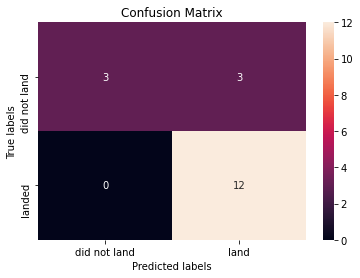

In [22]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

<h3>4. K Neighbour Classifier</h3>

In [23]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [24]:
knn_cv=GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [25]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


In [26]:
knn_cv.score(X_test, Y_test)

0.8333333333333334

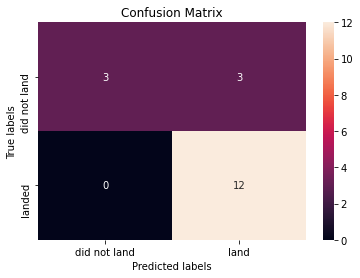

In [27]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

<h4>Find the method between these four classifier which performs best</h4>


In [28]:
#function to calculate scores
from sklearn.metrics import jaccard_score, f1_score
def scores(x, y):
    accuracy_scores = [logreg_cv.score(x, y), svm_cv.score(x, y), tree_cv.score(x, y), knn_cv.score(x, y)]
    
    pred = [logreg_cv.predict(x), svm_cv.predict(x), tree_cv.predict(x), knn_cv.predict(x)]
    
    f1_scores = [
             f1_score(y, pred[0], average='binary'),
             f1_score(y, pred[1], average='binary'),
             f1_score(y, pred[2], average='binary'),
             f1_score(y, pred[3], average='binary')
            ]
    
    jaccard_scores = [
                  jaccard_score(y, pred[0], average='binary'),
                  jaccard_score(y, pred[1], average='binary'),
                  jaccard_score(y, pred[2], average='binary'),
                  jaccard_score(y, pred[3], average='binary')
                 ]

    scores_dataframe = pd.DataFrame(np.array([accuracy_scores, f1_scores, jaccard_scores]),
                                    index=['Accurcy_Score', 'F1_Score', 'Jaccard_Score'],
                                    columns=['LogReg', 'SVM', 'Tree', 'KNN'])
    return(scores_dataframe)

In [29]:
#scores of test data
print("Score of all four models with test data")
scores(X_test, Y_test)

Score of all four models with test data


,LogReg,SVM,Tree,KNN
Accurcy_Score,0.833333,0.833333,0.722222,0.833333
F1_Score,0.888889,0.888889,0.800000,0.888889
Jaccard_Score,0.800000,0.800000,0.666667,0.800000


Confusion matrix of all svm model with the whole data


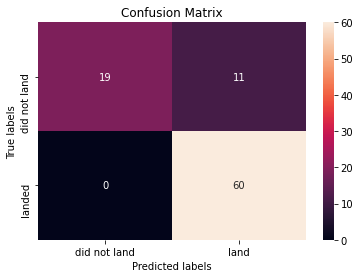

In [30]:
print("Confusion matrix of all svm model with the whole data")
yhat = svm_cv.predict(X)
plot_confusion_matrix(Y,yhat)

Confusion matrix of decision tree model with the whole data


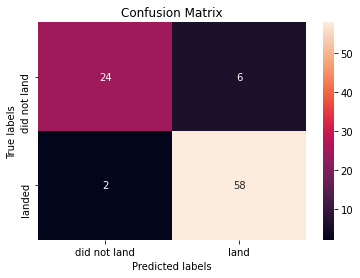

In [31]:
print("Confusion matrix of decision tree model with the whole data")
yhat = tree_cv.predict(X)
plot_confusion_matrix(Y,yhat)

In [32]:
#scores of whole data
print("Score of all four models with the whole data")
scores(X, Y)

Score of all four models with the whole data


,LogReg,SVM,Tree,KNN
Accurcy_Score,0.866667,0.877778,0.911111,0.855556
F1_Score,0.909091,0.916031,0.935484,0.900763
Jaccard_Score,0.833333,0.845070,0.878788,0.819444
